<a href="https://colab.research.google.com/github/pdpcosta/COVID-19_Brazil/blob/master/Python/COVID_19_Brazil_States.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reading data

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Reading Brazilian data
urlbr='https://raw.githubusercontent.com/pdpcosta/COVID-19_Brazil/master/DATA/COVID-19_Brazil_CONF_DEATH.csv'
dfbr=pd.read_csv(urlbr)
#print(dfbr)
dfbr['Date']=pd.to_datetime(dfbr['Date'])
#df=df.astype({"Confirmed":int})
#print(dfbr.dtypes)
dfbr=dfbr.dropna()


# Identifying the Top 5 States in Number of Confirmed Cases


In [3]:
lastday=dfbr.Date.iloc[-1]
print(lastday)
topfivestates=dfbr[dfbr.Date==lastday].sort_values('Confirmed',ascending = False).head(5)
print ("Top 5 States in Number of Cases\n",topfivestates)


2020-04-26 00:00:00
Top 5 States in Number of Cases
          Region State       Date  Confirmed  Death
1611  Southeast    SP 2020-04-26    20715.0   1700
1177  Southeast    RJ 2020-04-26     7111.0    645
371   Northeast    CE 2020-04-26     6260.0    376
991   Northeast    PE 2020-04-26     4898.0    415
185       North    AM 2020-04-26     3833.0    304


# A Simple Graph of the Top 5 States in Confirmed Cases

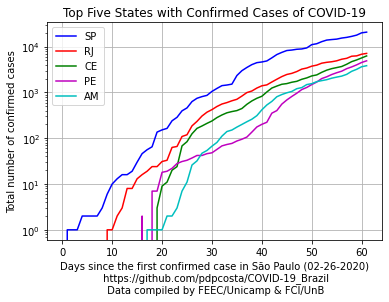

In [5]:
# SP was the first state with confirmed cases in Brazil, so it is used as a reference.
sp=dfbr[dfbr.State=="SP"]
days_sp=np.asarray(range(len(sp)))
sp_epidemy=sp[(sp['Confirmed']>0)]


n1state=topfivestates["State"].iloc[0]
n2state=topfivestates["State"].iloc[1]
n3state=topfivestates["State"].iloc[2]
n4state=topfivestates["State"].iloc[3]
n5state=topfivestates["State"].iloc[4]

confirmedn1=dfbr[(dfbr['State']==n1state)]
confirmedn2=dfbr[(dfbr['State']==n2state)]
confirmedn3=dfbr[(dfbr['State']==n3state)]
confirmedn4=dfbr[(dfbr['State']==n4state)]
confirmedn5=dfbr[(dfbr['State']==n5state)]
#print(n1state,n2state,n3state,n4state,n5state)

plt.title("Top Five States with Confirmed Cases of COVID-19")
plt.plot(days_sp,confirmedn1['Confirmed'],label=n1state,color="b") #Real data
plt.plot(days_sp,confirmedn2['Confirmed'],label=n2state,color="r") #Real data
plt.plot(days_sp,confirmedn3['Confirmed'],label=n3state,color="g") #Real data
plt.plot(days_sp,confirmedn4['Confirmed'],label=n4state,color="m") #Real data
plt.plot(days_sp,confirmedn5['Confirmed'],label=n5state,color="c") #Real data
plt.grid()
plt.yscale('log')

plt.legend(loc="upper left")
plt.xlabel("Days since the first confirmed case in São Paulo (02-26-2020)\n https://github.com/pdpcosta/COVID-19_Brazil\n Data compiled by FEEC/Unicamp & FCI/UnB")
plt.ylabel("Total number of confirmed cases")
plt.show()



# Exponential and Logistic projections for São Paulo from the last week, and how it evolved

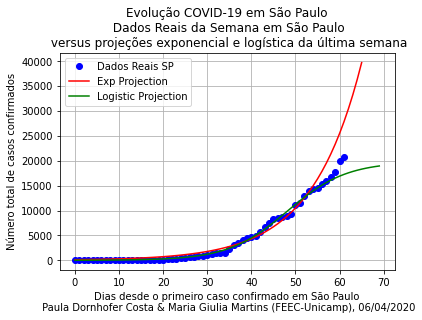

In [9]:


sp_epidemy=sp[(sp['Confirmed']>0)]
sp_day1=sp_epidemy['Date'].iloc[0]
sp_day1=sp_day1-pd.Timedelta(days=1)
sp_epidemy=sp[(sp['Date']>=sp_day1)]

#print((sp_epidemy[:-6])['Confirmed'])

def exponential_model(x, a, b, c):
     return a*np.exp(b*(x-c))

def logistic_model (x, a, b, c):
  return c/(1+np.exp(-(x-b)/a))

expfit_sp=curve_fit(exponential_model,np.asarray(range(len(sp_epidemy)-6)),(sp_epidemy[:-6])['Confirmed'],p0=[1,1,1])
logfit_sp=curve_fit(logistic_model,np.asarray(range(len(sp_epidemy)-6)),(sp_epidemy[:-6])['Confirmed'],p0=[1,1,1])

days1=np.asarray(range(len(sp_epidemy))) # SP is the first state with epidemy in Brazil
days=np.asarray(range(70))
plt.title("Evolução COVID-19 em São Paulo\n Dados Reais da Semana em São Paulo\n versus projeções exponencial e logística da última semana")
plt.plot(days1,sp_epidemy['Confirmed'],'ro',label="Dados Reais SP",color="b") #Real data
plt.plot(np.asarray(range(len(sp_epidemy)+4)), [exponential_model(i,expfit_sp[0][0],expfit_sp[0][1],expfit_sp[0][2]) for i in np.asarray(range(len(sp_epidemy)+4))], label="Exp Projection", color = 'r' )#Predicted logistic curve)
plt.plot(days, [logistic_model(i,logfit_sp[0][0],logfit_sp[0][1],logfit_sp[0][2]) for i in days], label="Logistic Projection", color = 'g' )#Predicted logistic curve
plt.grid()
plt.legend(loc="upper left")
plt.xlabel("Dias desde o primeiro caso confirmado em São Paulo\n Paula Dornhofer Costa & Maria Giulia Martins (FEEC-Unicamp), 06/04/2020")
plt.ylabel("Número total de casos confirmados")
plt.show()



# A similar analysis for RJ



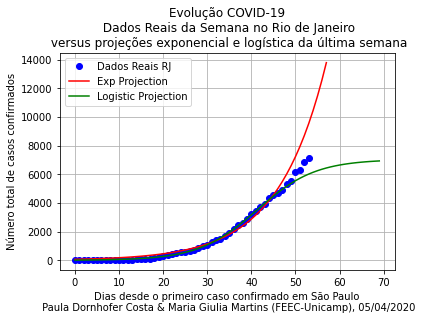

In [11]:
rj=dfbr[dfbr.State=="RJ"]

rj_epidemy=rj[(rj['Confirmed']>0)]
rj_day1=rj_epidemy['Date'].iloc[0]
rj_day1=rj_day1-pd.Timedelta(days=1)
rj_epidemy=rj[(rj['Date']>=rj_day1)]

expfit_rj=curve_fit(exponential_model,np.asarray(range(len(rj_epidemy)-6)),(rj_epidemy[:-6])['Confirmed'],p0=[1,1,1])
logfit_rj=curve_fit(logistic_model,np.asarray(range(len(rj_epidemy)-6)),(rj_epidemy[:-6])['Confirmed'],p0=[1,1,1])

plt.title("Evolução COVID-19\n Dados Reais da Semana no Rio de Janeiro\n versus projeções exponencial e logística da última semana")
plt.plot(np.asarray(range(len(rj_epidemy))),rj_epidemy['Confirmed'],'ro',label="Dados Reais RJ",color="b") #Real data
plt.plot(np.asarray(range(len(rj_epidemy)+4)), [exponential_model(i,expfit_rj[0][0],expfit_rj[0][1],expfit_rj[0][2]) for i in np.asarray(range(len(rj_epidemy)+4))], label="Exp Projection", color = 'r' )#Predicted logistic curve)
plt.plot(days, [logistic_model(i,logfit_rj[0][0],logfit_rj[0][1],logfit_rj[0][2]) for i in days], label="Logistic Projection", color = 'g' )#Predicted logistic curve
plt.grid()
plt.legend(loc="upper left")
plt.xlabel("Dias desde o primeiro caso confirmado em São Paulo\n Paula Dornhofer Costa & Maria Giulia Martins (FEEC-Unicamp), 05/04/2020")
plt.ylabel("Número total de casos confirmados")
plt.show()

